# Predicting Food Delivery Time Using Zomato Dataset
Zomato is a online food delivery app in India.

A huge number of cities population uses the services of Zomato to find its next meal of the day.

The data below is useful as it can answer so many questions which matter to me personally as a dweller of the country who is highly reliant on the app.

1. We have removed the Restaurant ID and grouped the Restaurant on the basis of in which city they are located to easily predict the delivery time for every individual city.

2. In every plot Y-axis states How Often the delivery is done for it's respective delivery time shown on X-Axis.

## Data Pre-Processing on Training Data

In [1]:
# Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") # It will ignore the warnings

In [2]:
# Importing data
train = pd.read_excel("D:/PGDA Files/Python/Python datasets/Zomato/Data_Train.xlsx") 
col_name_train=train.columns
print(col_name_train)

Index(['Location', 'Cuisines', 'Average_Cost(₹)', 'Minimum_Order(₹)', 'Rating',
       'Votes', 'Reviews', 'Delivery_Time()'],
      dtype='object')


In [3]:
# Function to count number of cuisines in particular restaurant
def countoc(s):
    a=s.split(',')
    return len(a)

In [4]:
# Counting the number of cusines by every individual restaurant
train['Cuisines']=train['Cuisines'].apply(lambda x: countoc(x))
train.head()

,Location,Cuisines,Average_Cost(₹),Minimum_Order(₹),Rating,Votes,Reviews,Delivery_Time()
0,Delhi,1,150,50,-,-,-,30
1,Noida,6,400,50,NEW,-,-,30
2,Delhi,1,150,50,3.6,36,7,30
3,Bangalore,2,250,50,3.7,96,55,30
4,Delhi,1,200,50,3.9,61,45,30


In [5]:
# Factorizing the Location
train['Location'], _ = pd.factorize(train['Location'], sort=True)

In [6]:
# Checking the datatypes of training data
train.dtypes

Location             int64
Cuisines             int64
Average_Cost(₹)     object
Minimum_Order(₹)     int64
Rating              object
Votes               object
Reviews             object
Delivery_Time()      int64
dtype: object

In [7]:
# Converting Object to numeric
train = train.apply(pd.to_numeric,errors='coerce')

In [8]:
# Finding missing values in training data
train.isna().sum()

Location               0
Cuisines               0
Average_Cost(₹)        1
Minimum_Order(₹)       0
Rating              1963
Votes               2074
Reviews             2312
Delivery_Time()        0
dtype: int64

In [9]:
# Dealing with missing values into the training data
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
train=imputer.fit_transform(train)

In [10]:
# Converting training data to dataframe from array type
train=pd.DataFrame(train)

In [11]:
# Assigning the column names as per it's index values
train.columns = col_name_train

In [12]:
# Writing cleaned data to csv
train.to_csv("D:/PGDA Files/Python/Python datasets/Zomato/cleaned train.csv")

## Data Pre-Processing on Testing Data

In [13]:
# Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") # It will ignore the warnings

In [14]:
# Importing data
Test = pd.read_excel("D:/PGDA Files/Python/Python datasets/Zomato/Data_Test.xlsx") 
col_name_test=Test.columns
print(col_name_test)

Index(['Location', 'Cuisines', 'Average_Cost(₹)', 'Minimum_Order(₹)', 'Rating',
       'Votes', 'Reviews'],
      dtype='object')


In [15]:
# Function to count number of cuisines in particular restaurant
def countoc(s):
    a=s.split(',')
    return len(a)

In [16]:
# Counting the number of cusines by every individual restaurant
Test['Cuisines']=Test['Cuisines'].apply(lambda x: countoc(x))
Test.head()

,Location,Cuisines,Average_Cost(₹),Minimum_Order(₹),Rating,Votes,Reviews
0,Delhi,2,100,50,3.4,19,1
1,Delhi,1,150,50,3.6,36,7
2,Kolkata,5,250,99,3.6,182,51
3,Noida,3,150,50,3.6,116,41
4,Mumbai,2,100,50,3.0,4,1


In [17]:
# Factorizing the Location
Test['Location'], _ = pd.factorize(Test['Location'], sort=True)

In [18]:
# Checking the datatypes of Testing data
Test.dtypes

Location             int64
Cuisines             int64
Average_Cost(₹)      int64
Minimum_Order(₹)     int64
Rating              object
Votes               object
Reviews             object
dtype: object

In [19]:
# Converting Object to numeric
Test = Test.apply(pd.to_numeric,errors='coerce')

In [20]:
# Finding missing values in Testing data
Test.isna().sum()

Location              0
Cuisines              0
Average_Cost(₹)       0
Minimum_Order(₹)      0
Rating              507
Votes               542
Reviews             593
dtype: int64

In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
Test=imputer.fit_transform(Test)

In [22]:
# Converting Testing data to dataframe from array type
Test=pd.DataFrame(Test)

In [23]:
# Assigning the column names as per it's index values
Test.columns = col_name_test

In [24]:
# Writing cleaned data to csv
Test.to_csv("D:/PGDA Files/Python/Python datasets/Zomato/cleaned Test.csv")

# Model Building and Visualizing

## Seperating the Dependent and Independent Variables from training dataset

In [25]:
x = train.iloc[:,0:7].values #Independent Variables
y = train.iloc[:,[-1]].values # Dependent Variable

## Linear Regression

[ 1.47162952e-01  5.93474145e-01  5.05813440e-03  1.81137491e-01
  6.61294963e+00  7.81007949e-03 -1.18768804e-02]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                          1.547e+04
Date:                Wed, 08 Jan 2020   Prob (F-statistic):                        0.00
Time:                        23:58:03   Log-Likelihood:                         -43230.
No. Observations:               11094   AIC:                                  8.647e+04
Df Residuals:                   11087   BIC:                                  8.652e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
     

Text(0.5, 1.0, 'Linear regression')

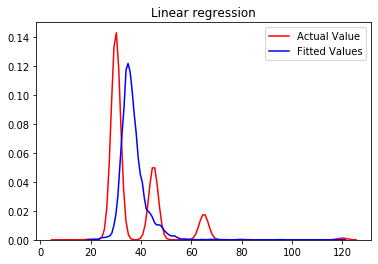

In [26]:
#Building Model
import statsmodels.api as sm
Linear_Regression = sm.OLS(y,x)
result = Linear_Regression.fit() 
print(result.params)
print(result.summary())

# Predicting the delivery time
y_pred_lr=result.predict(x)

# Visualization
import seaborn as sns
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_lr, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Linear regression')

## Polynomial regression

Accuracy for Polynomial regression is:  0.2512907180641597


Text(0.5, 1.0, 'Polynomial regression')

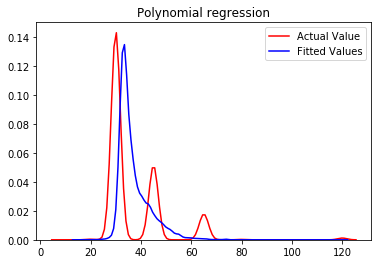

In [27]:
#Building Model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
poly_reg.fit(x_poly,y)
line_reg_2=LinearRegression()
line_reg_2.fit(x_poly,y)

# Predicting the values
y_pred_polyreg=line_reg_2.predict(poly_reg.fit_transform(x))

# Checking it's r-square value
from sklearn.metrics import r2_score
print("Accuracy for Polynomial regression is: ",r2_score(y, y_pred_polyreg))

# Visualization
import seaborn as sns
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_polyreg, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Polynomial regression')

## Decision Tree Regression

Accuracy for decision tree regressor is:  0.9958981845071475


Text(0.5, 1.0, 'Decisiion Tree Regression')

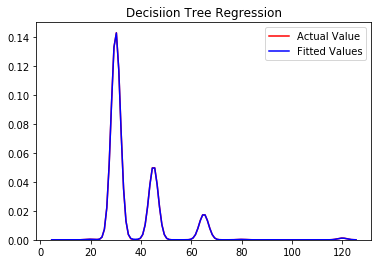

In [28]:
# Building model
from sklearn.tree import DecisionTreeRegressor
reg_dt= DecisionTreeRegressor()
reg_dt.fit(x,y)

#Predicting the value
y_pred_dt=reg_dt.predict(x)

#Obtaining the r-squared score
print("Accuracy for decision tree regressor is: ",reg_dt.score(x,y))

#Visualizing
import seaborn as sns
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_dt, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Decisiion Tree Regression')

NOTE: DECISION TREE GETS OVERFITTED

## Random forest regression

Accuracy for random forest regressor is:  0.9203393189375244


Text(0.5, 1.0, 'Random Forest regression')

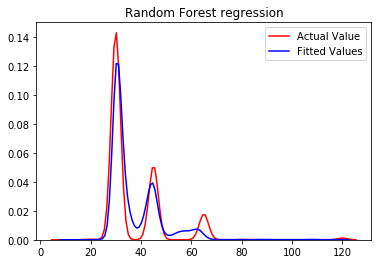

In [29]:
# Building the model
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(max_depth=500, random_state=0)
reg_rf.fit(x, y)

# Predicting the value
y_pred_rf=reg_rf.predict(x)

# Obtaining the r-squared score
print("Accuracy for random forest regressor is: ",reg_rf.score(x,y))

#Visualizing
import seaborn as sns
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_rf, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Random Forest regression')

## XGBoost

Accuracy is:  0.20715956334512153
Standard Deviation is:  0.03338052694727723


Text(0.5, 1.0, 'XGBoost regression')

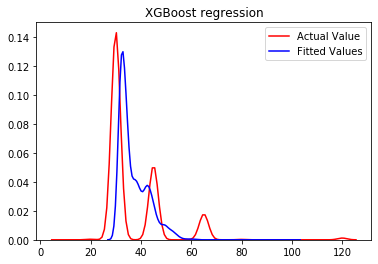

In [30]:
#Fitting XFBoost to the training set
from xgboost import XGBRegressor
import xgboost as xgb
xgr = XGBRegressor(objective ='reg:squarederror')
xgr.fit(x,y)
# =============================================================================

# =============================================================================
# # Predicting the test set results
y_pred_xg = xgr.predict(x)
# =============================================================================

# =============================================================================
# # Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=xgr, X=x, y=y, cv=10)
accuracy=accuracies.mean()
print("Accuracy is: ",accuracy)
std=accuracies.std()
print("Standard Deviation is: ",std)
# =============================================================================

# =============================================================================
#Visualizing
import seaborn as sns
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_xg, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('XGBoost regression')

